# **About**


This mini-project will delve into the sector of __search engine__ by analyzing a __questions dataset__ from a Quora, available at [Kaggle](https://www.kaggle.com/datasets/quora/question-pairs-dataset).


This dataset contains over 290000 questions/queries from Quora with multiple subjects. The primary objective is to __label all questions__ for further __cluster analysis__.

Furthermore, this project will also compare **different types of clustering algorithms** and the **differences of vectorizing and embedding** to compare results.

# **0.&nbsp;Connect to G-Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
default_dir = "/content/drive/MyDrive/Datasets"
os.chdir(default_dir)

In [3]:
!ls

questions.csv


# **1.&nbsp;Setup and Initialization**

## 1.1. Importing Necessary Libraries

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First of all, we will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap

# Data Pre-Processing & Feature Engineering
import re
import string
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
import spacy
nlp = spacy.load("en_core_web_sm")


# Modeling
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import hdbscan


# Model Evaluation
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from hdbscan.validity import validity_index


# Other Utilities
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [5]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(
    rc={'axes.facecolor': '#fcf0dc'},
    style='darkgrid'
)

## 1.2. Loading the Dataset


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, we will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [6]:
df = pd.read_csv(
    'questions.csv'
)

# **2.&nbsp;Initial Data Analysis**

## 2.1. Dataset Overview

In [7]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Since we will only focus on one column (question1 OR question2) to simplify the datasets, lets pick them

In [9]:
question1 = df['question1']
question2 = df['question2']

# **3.&nbsp;Data Cleaning & Transformation**

This step encompasses a comprehensive cleaning and transformation process to refine the dataset.

It includes:
- addressing missing values.
- eliminating duplicate entries.

## 3.1. Missing Values

Because this is a text-based dataset, missing values will be removed

In [10]:
# Check missing values for both dataset
print("null in question1 = ", question1.isnull().sum())
print("null in question2 = ", question2.isnull().sum())

null in question1 =  1
null in question2 =  2


In [11]:
# Remove null
question1 = question1.dropna()
question2 = question2.dropna()

## 3.2. Handling Duplicates

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, I am going to recognize duplicate rows in the dataset:

In [12]:
# Find duplicated rows
print("duplicated in question1 = ", question1.duplicated().sum())
print("duplicated in question2 = ", question2.duplicated().sum())

duplicated in question1 =  113878
duplicated in question2 =  105147


In [13]:
# Remove duplicated rows
question1 = question1.drop_duplicates()
question2 = question2.drop_duplicates()

In [14]:
# Check duplicated rows
print("duplicated in question1 = ", question1.duplicated().sum())
print("duplicated in question2 = ", question2.duplicated().sum())

duplicated in question1 =  0
duplicated in question2 =  0


Lets check the final dataset

In [15]:
print(question1.info())
print(question2.info())

<class 'pandas.core.series.Series'>
Index: 290472 entries, 0 to 404350
Series name: question1
Non-Null Count   Dtype 
--------------   ----- 
290472 non-null  object
dtypes: object(1)
memory usage: 4.4+ MB
None
<class 'pandas.core.series.Series'>
Index: 299202 entries, 0 to 404350
Series name: question2
Non-Null Count   Dtype 
--------------   ----- 
299202 non-null  object
dtypes: object(1)
memory usage: 4.6+ MB
None


## 3.3. Combining Datasets

Lets combine them and go through cleaning again for a richer datasets

In [16]:
questions = pd.concat([question1, question2], axis=0)
print(questions.info())

<class 'pandas.core.series.Series'>
Index: 589674 entries, 0 to 404350
Series name: None
Non-Null Count   Dtype 
--------------   ----- 
589674 non-null  object
dtypes: object(1)
memory usage: 9.0+ MB
None


In [17]:
print("duplicated in questions = ", questions.duplicated().sum())
print("null in questions = ", questions.isnull().sum())

duplicated in questions =  52287
null in questions =  0


In [18]:
questions = questions.drop_duplicates()
questions = questions.dropna()

Lets check the final dataset

In [19]:
questions.info()

<class 'pandas.core.series.Series'>
Index: 537387 entries, 0 to 404350
Series name: None
Non-Null Count   Dtype 
--------------   ----- 
537387 non-null  object
dtypes: object(1)
memory usage: 8.2+ MB


## 3.4. Remove Stopwords with Regex

Stopwords does not tell meanings, thus removing them will ease the clustering process

In [20]:
stopwords = set([
    "a","an","the","and","or","but","if","while","is","am","are","was","were",
    "to","of","in","on","for","with","by","at","from","up","down","out","over","under"
])

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation & digits
    text = re.sub(f"[{string.punctuation}0-9]", " ", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    # Remove stopwords using regex word boundaries
    pattern = r"\b(" + "|".join(stopwords) + r")\b"
    text = re.sub(pattern, "", text)
    # Remove multiple spaces again
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [21]:
# Apply to dataset
questions_processed = questions.apply(preprocess_text)

In [22]:
questions.head()

,0
0,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,How can I increase the speed of my internet co...
3,Why am I mentally very lonely? How can I solve...
4,"Which one dissolve in water quikly sugar, salt..."


In [23]:
questions_processed.head()

,0
0,what step step guide invest share market india
1,what story kohinoor koh i noor diamond
2,how can i increase speed my internet connectio...
3,why i mentally very lonely how can i solve it
4,which one dissolve water quikly sugar salt met...


# **4.&nbsp;Tokenization, Vectorizing, and Embedding**

Before clustering, text must be turned into numbers (vector), as **machines need numbers**.

To capture context, embedding will be used.

So, in short:
1. Vectorizing = turning words into numbers
2. Embedding = turning text into meaning vectors

We will do both to compare the results

Also, since the length is different for every sentences, lets try to normalize before clustering

Tokenization is crucial to break down sentences into words before vectorizing.

But, embedding models already have their own tokenization, so can be fed with the senteces directly

## 4.1 Tokenization and Vectorization

In [24]:
def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    # This already include lemmatization

In [25]:
# Vectorization
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
vectors = vectorizer.fit_transform(questions_processed)

KeyboardInterrupt: 

## 4.2 Embedding (SBERT)

Remember that we have over half a million rows. Lets do this in batch

In [26]:
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_embed = sbert_model.encode(questions_processed.tolist(),
                                 batch_size=256)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

KeyboardInterrupt: 

IT TOOK TOO LONG (Yeah because the dataset was over half a million)

## 4.3. Preprocessing & Embedding with clipped dataset

Lets clip the dataset to 10K rows only, extracted random

In [26]:
# Clip the dataset to 10K rows
clipped_question = questions_processed.sample(n=10000, random_state=42)
clipped_question.info()

<class 'pandas.core.series.Series'>
Index: 10000 entries, 276905 to 29033
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 156.2+ KB


In [27]:
clipped_question.head(10)

,0
276905,what salary range year experience senior softw...
318689,how do i get better settlers catan
174429,formation advantage disadvantages
287601,my best friend loves my girl friend she knows ...
71867,should older heavier beginner chose glider reg...
273443,what contributions philosophers have made fiel...
268043,what story christian mythology nost relevant t...
98260,what s formula finding internal temperature ob...
106469,do we live inside black hole
402617,how do i control my horny emotions


In [36]:
# Vectorizing
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
vectors = vectorizer.fit_transform(clipped_question)

In [37]:
# Embedding with all-miniLM
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')
sbert_embed = sbert_model.encode(clipped_question.tolist(),
                                 batch_size=256)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [31]:
# Embedding with multi-qa-mpnet
sbert_model_2 = SentenceTransformer("multi-qa-mpnet-base-dot-v1")
sbert_embed_2 = sbert_model_2.encode(clipped_question.tolist(),
                                 batch_size=256)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [133]:
# Normalize embeddings to unit length
sbert_norm = normalize(sbert_embed).astype(np.float64)
sbert_norm_2 = normalize(sbert_embed_2).astype(np.float64)

# **5.&nbsp;Clustering**

## 5.1. KMeans Clustering

In KMeans clustering, we have to decide the number of k. Lets use silhouette score to determine the k for each preprocessed data

### 5.1.1 Find k

#### 5.1.1.1 TFIDF

In [38]:
possible_k = []
silhouette = []

for k in range(50,100):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(vectors)
    silhouette.append(silhouette_score(X=vectors, labels=kmeans.labels_))
    possible_k.append(k)

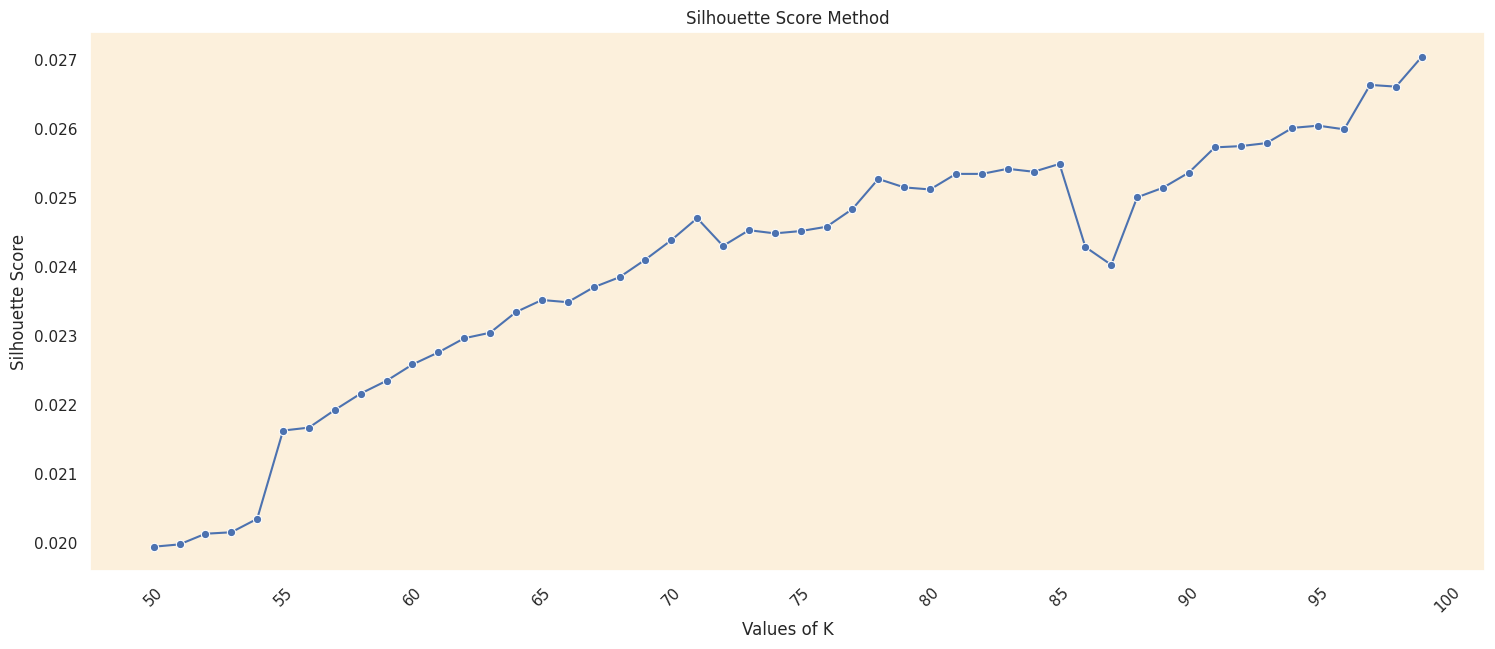

In [39]:
# Plot the score
plt.figure(figsize=(18, 7))
sns.lineplot(x=possible_k, y=silhouette, marker='o')
plt.xticks(range(50, 101, 5), rotation=45)  # show ticks every 5
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show()

#### 5.1.1.2 Find k For Embed with all-miniLM

In [157]:
possible_k = []
silhouette = []

for k in range(50,100):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(sbert_norm)
    silhouette.append(silhouette_score(X=vectors, labels=kmeans.labels_))
    possible_k.append(k)

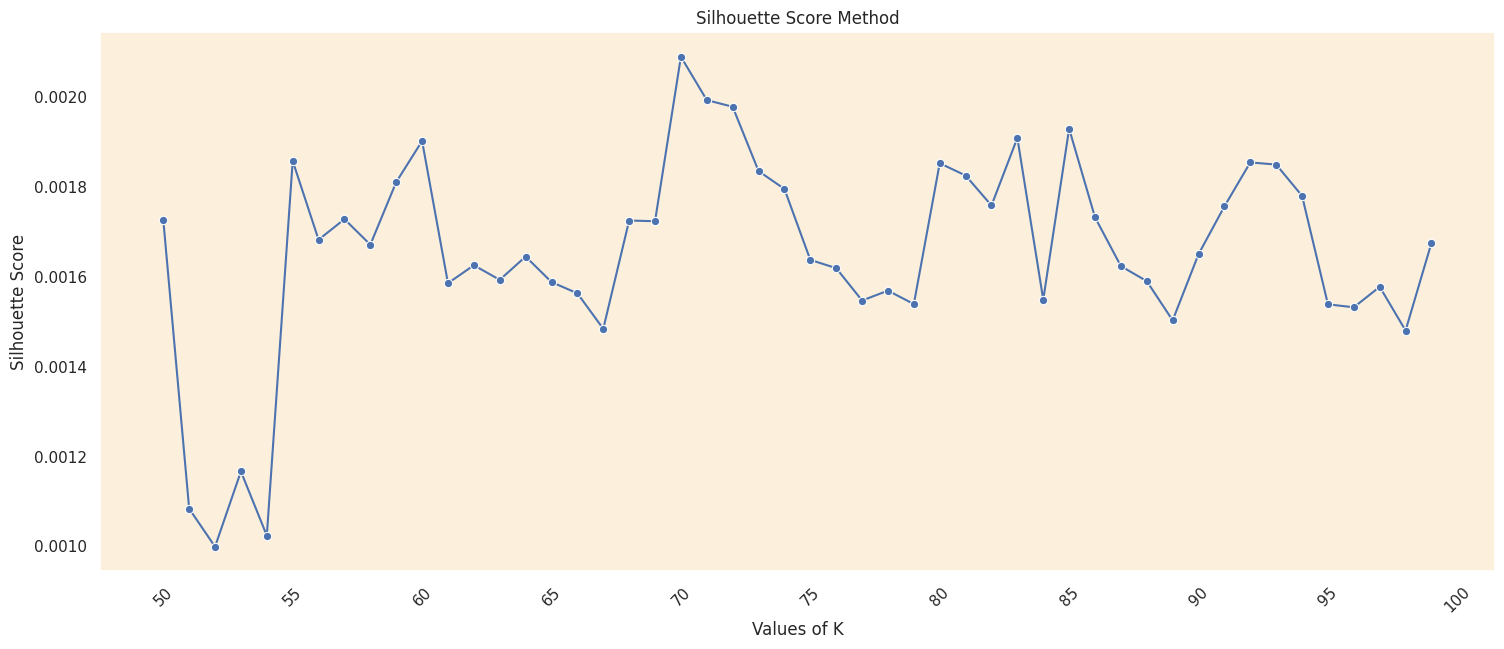

In [158]:
# Plot the score
plt.figure(figsize=(18, 7))
sns.lineplot(x=possible_k, y=silhouette, marker='o')
plt.xticks(range(50, 101, 5), rotation=45)  # show ticks every 5
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show()

#### 5.1.1.3 Find k For Embed with multi-qa-mpnet

In [160]:
possible_k = []
silhouette = []

for k in range(50,100):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(sbert_norm_2)
    silhouette.append(silhouette_score(X=vectors, labels=kmeans.labels_))
    possible_k.append(k)

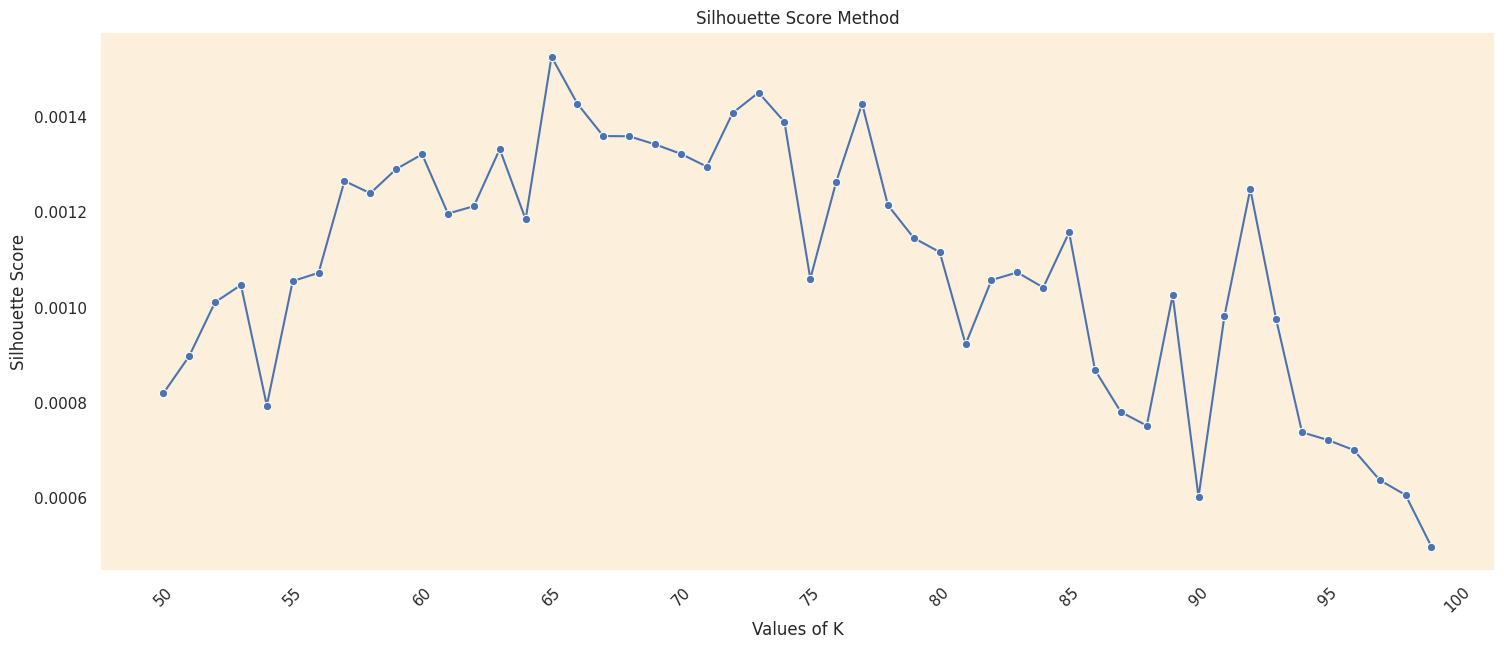

In [161]:
# Plot the score
plt.figure(figsize=(18, 7))
sns.lineplot(x=possible_k, y=silhouette, marker='o')
plt.xticks(range(50, 101, 5), rotation=45)  # show ticks every 5
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid()
plt.show()

### 5.1.2 KMeans with k + PCA

From the plot above, we can infer that:
1. TFIDF is best with k = 100
2. MiniLM is best with k = 70
3. MPNet is best with k = 65

Lets do clustering based on that and visualize with PCA

#### 5.1.2.1 TFIDF

In [40]:
# Clustering
kmeans_tfidf = KMeans(n_clusters=100, random_state=42).fit(vectors)
kmeans_result_tfidf = clipped_question.copy()
kmeans_result_tfidf['cluster'] = kmeans_tfidf.labels_

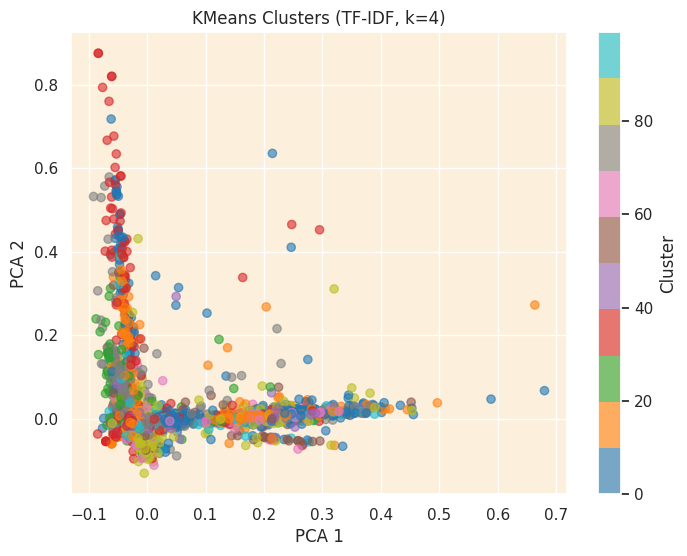

In [41]:
# Reduce TFIDF vectors to 2D for visualization
pca = PCA(n_components=2, random_state=42)
reduced_vectors = pca.fit_transform(vectors.toarray())

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(
    reduced_vectors[:,0], reduced_vectors[:,1],
    c=kmeans_result_tfidf['cluster'],
    cmap='tab10', alpha=0.6
)
plt.title("KMeans Clusters (TF-IDF, k=4)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

In [42]:
# Top terms per cluster
# Get cluster centers (in TFIDF space)
order_centroids = kmeans_tfidf.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("Top terms per cluster:")
for i in range(100):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_terms)}")


Top terms per cluster:
Cluster 0: well, coach, course, institute, student, iit, java, rs, colour, way
Cluster 1: place, good, visit, tourist, house, near, buy, india, travel, munnar
Cluster 2: account, delete, facebook, gmail, message, instagram, icloud, deposit, recover, snapchat
Cluster 3: question, ask, quora, interview, improvement, mark, detail, need, possible, meet
Cluster 4: language, programming, good, keyword, english, word, easy, late, version, framework
Cluster 5: number, phone, track, account, imei, mobile, bank, integer, find, series
Cluster 6: think, trump, donald, win, election, presidency, indians, affect, happen, presidential
Cluster 7: way, good, easy, s, fast, find, job, atheist, natural, frozen
Cluster 8: book, good, read, write, favorite, fiction, s, recommend, preparation, life
Cluster 9: deal, oil, lawyer, hdmi, port, transformer, company, connect, olive, indecisive
Cluster 10: thing, bad, good, life, see, say, happen, s, word, frustrating
Cluster 11: experience,

#### 5.1.2.2 MiniLM

In [165]:
# Clustering
kmeans_minilm = KMeans(n_clusters=70, random_state=42).fit(sbert_norm)
kmeans_result_minilm = clipped_question.copy()
kmeans_result_minilm['cluster'] = kmeans_minilm.labels_

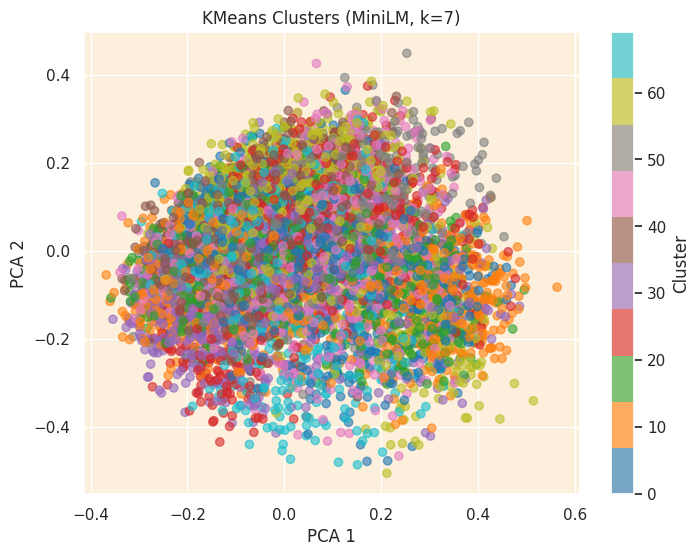

In [166]:
# Reduce TFIDF vectors to 2D for visualization
pca = PCA(n_components=2, random_state=42)
reduced_vectors = pca.fit_transform(sbert_norm)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(
    reduced_vectors[:,0], reduced_vectors[:,1],
    c=kmeans_result_minilm['cluster'],
    cmap='tab10', alpha=0.6
)
plt.title("KMeans Clusters (MiniLM, k=7)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

In [167]:
# Top terms per cluster
# Get cluster centers (in MiniLM space)
order_centroids = kmeans_minilm.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("Top terms per cluster:")
for i in range(70):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_terms)}")


Top terms per cluster:
Cluster 0: according, adayar, achievements, affiliate, airguns, adder, accidental, advil, ambidextrous, agents
Cluster 1: alexandria, adenovirus, aged, al, achievements, aesthetics, agape, alternate, agents, album
Cluster 2: acid, adult, airlines, activity, age, aim, adenovirus, aged, alimony, alabama
Cluster 3: abuse, akash, aas, aged, acids, agencies, agricultural, adversely, affect, adder
Cluster 4: aas, alongside, acidic, agape, aad, activities, aggregate, ambition, alex, amateur
Cluster 5: allergies, alarm, akkad, aluminum, ambidextrous, alleviation, aipmt, adayar, abs, algorithms
Cluster 6: abhiyan, alerts, airlines, allies, allowed, acquire, acceptable, adversely, adenovirus, agencies
Cluster 7: acceptance, agartala, alawites, agi, affects, activities, aerobic, aadhar, altruism, afterwards
Cluster 8: allies, actively, agents, ab, accidental, ale, always, alerts, adopt, aggregators
Cluster 9: ahirs, actual, adenovirus, acquire, aipmt, aap, advancing, airpor

#### 5.1.2.3 MPNet

In [168]:
# Clustering
kmeans_mpnet = KMeans(n_clusters=65, random_state=42).fit(sbert_norm_2)
kmeans_result_mpnet = clipped_question.copy()
kmeans_result_mpnet['cluster'] = kmeans_mpnet.labels_

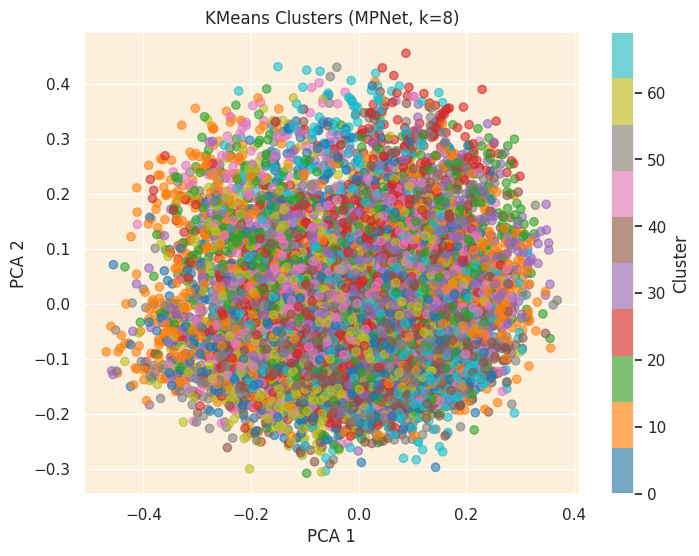

In [169]:
# Reduce TFIDF vectors to 2D for visualization
pca = PCA(n_components=2, random_state=42)
reduced_vectors = pca.fit_transform(sbert_norm_2)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(
    reduced_vectors[:,0], reduced_vectors[:,1],
    c=kmeans_result_minilm['cluster'],
    cmap='tab10', alpha=0.6
)
plt.title("KMeans Clusters (MPNet, k=8)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

In [170]:
# Top terms per cluster
# Get cluster centers (in MPNet space)
order_centroids = kmeans_mpnet.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("Top terms per cluster:")
for i in range(65):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i}: {', '.join(top_terms)}")


Top terms per cluster:
Cluster 0: anna, assets, antique, agents, altruism, acer, acceptance, armpit, acne, attitude
Cluster 1: anna, agents, arm, accelerate, aerospace, aids, addressing, actor, agricultural, actuarial
Cluster 2: anna, all, alawites, airway, ant, addressing, argon, accepting, asm, accident
Cluster 3: anna, ann, agents, administration, alveolar, angelo, angels, astrological, addresses, assets
Cluster 4: anna, ahead, acceptance, atm, adrian, alternatives, ahmedabad, accelerate, assumed, academies
Cluster 5: anna, alternatives, approach, apache, absence, amor, arm, acer, addressing, atoms
Cluster 6: anna, angier, alawites, accelerate, argon, arrogance, addressing, accent, amor, asm
Cluster 7: anna, arrogance, academies, addressing, argon, alveolar, approach, accelerate, asm, analyst
Cluster 8: anna, adrian, alawites, agape, ahmedabad, aerospace, agents, agrippa, absence, accident
Cluster 9: anna, assets, alawites, agents, ann, analyst, attractions, adrian, acceptance, acer

## 5.2. DBSCAN Clustering

DBSCAN work well for embeddings, so we skip TFIDF. It also doesnt need to define k, as it is based on density

In [106]:
# Visualization function
def plot_clusters(embedding_2d, labels, title="Cluster Visualization"):
    plt.figure(figsize=(8,6))

    unique_labels = set(labels)

    # Draw clusters first (everything except -1)
    for label in unique_labels:
        if label == -1:
            continue
        mask = labels == label
        plt.scatter(
            embedding_2d[mask, 0], embedding_2d[mask, 1],
            s=20, alpha=0.7, label=f"Cluster {label}", zorder=2
        )

    # Draw noise last, behind clusters
    if -1 in unique_labels:
        mask = labels == -1
        plt.scatter(
            embedding_2d[mask, 0], embedding_2d[mask, 1],
            c="lightgray", s=20, alpha=0.5, label="Noise", zorder=1
        )

    plt.title(title)
    plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


### 5.2.1 MiniLM

Lets first grid search for eps

In [107]:
# Grid search for eps
for eps in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]:
    dbscan = DBSCAN(eps=eps, min_samples=5, metric='cosine')
    labels = dbscan.fit_predict(sbert_norm)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    score = silhouette_score(sbert_norm, labels, metric='cosine')
    dbcv_score = validity_index(sbert_norm, labels, metric='euclidean')

    print(f"eps={eps:.1f} → clusters={n_clusters}, noise={n_noise}, silhouette score={score}, dbcv score={dbcv_score}")


eps=0.2 → clusters=3, noise=9976, silhouette score=-0.06822965116227263, dbcv score=0.0013181844627661646
eps=0.3 → clusters=27, noise=9811, silhouette score=-0.17794810135685538, dbcv score=0.006517466035728633
eps=0.4 → clusters=107, noise=8436, silhouette score=-0.19261796999494687, dbcv score=0.017079687826581702
eps=0.5 → clusters=49, noise=4615, silhouette score=-0.13971953496839656, dbcv score=-0.00179484529725347
eps=0.6 → clusters=3, noise=811, silhouette score=-0.013351751136479826, dbcv score=-0.028620793919901397
eps=0.7 → clusters=1, noise=12, silhouette score=0.02726480932674159, dbcv score=nan


Lets try 0.5

In [108]:
# Cluster with eps = 0.5
# 1) Reset dataframe index to simple 0..N-1 (prevent mismatch)
df = clipped_question.reset_index(drop=True).to_frame(name="question")

# 2) Make sure embeddings are a numpy array and aligned to df length
X = np.asarray(sbert_norm)          # sbert_embed from SBERT (dense array)
print("X.shape:", X.shape)
print("df.shape:", df.shape)

# Trim X to df length (safe guard)
if X.shape[0] != len(df):
    print("Warning: embeddings and df length differ. Trimming embeddings to df length.")
    X = X[:len(df)]
print("After trim X.shape:", X.shape)

# 3) Run DBSCAN on X (the aligned embeddings)
db = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
labels = db.fit_predict(X)
labels = np.asarray(labels)
print("labels.shape:", labels.shape)
print("unique labels (sample):", np.unique(labels)[:20])

# 4) Final safety check: lengths must match
assert len(labels) == len(df), f"Length mismatch after clustering: {len(labels)} vs {len(df)}"

# 5) Attach labels to dataframe reliably
df['cluster'] = labels

# 6) Basic stats & evaluation
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = int((labels == -1).sum())
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")

if n_clusters > 1:
    try:
        score = silhouette_score(X, labels, metric='cosine')
        dbcv_score = validity_index(sbert_norm, labels, metric='euclidean')
        print(f"Silhouette score: {score:.4f}")
        print(f"DBCV score: {dbcv_score:.4f}")
    except Exception as e:
        print("Silhouette score error:", e)

# 7) Inspect clusters safely using groupby
for cid, group in df.groupby('cluster'):
    print(f"\nCluster {cid} (size={len(group)})")
    # print top 5 example queries
    for q in group['question'].head(5).tolist():
        print(" -", q)

X.shape: (10000, 384)
df.shape: (10000, 1)
After trim X.shape: (10000, 384)
labels.shape: (10000,)
unique labels (sample): [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
DBSCAN found 49 clusters and 4615 noise points
Silhouette score: -0.1397
DBCV score: -0.0018

Cluster -1 (size=4615)
 - how do i get better settlers catan
 - should older heavier beginner chose glider regular ft longboard
 - what s formula finding internal temperature object
 - why helium placed p block
 - what best place pre wedding shoot coimbatore

Cluster 0 (size=5087)
 - what salary range year experience senior software engineer india which company currently paying maximum this range
 - formation advantage disadvantages
 - my best friend loves my girl friend she knows it not doing anything what should i do
 - what contributions philosophers have made field medicine
 - what story christian mythology nost relevant today modern societies

Cluster 1 (size=7)
 - where can i get very affordable conveyanci

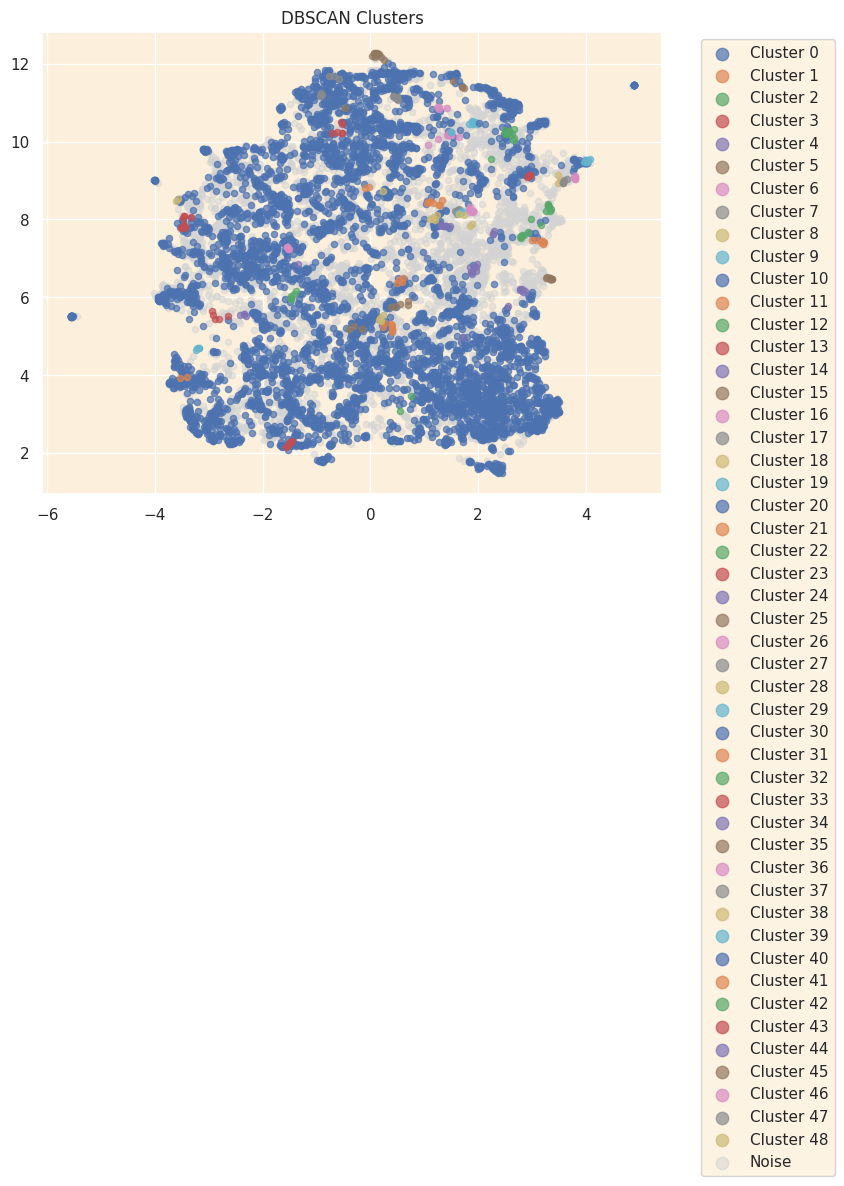

In [109]:
# Reduce to 2D for visualization
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(sbert_norm)
plot_clusters(embedding_2d, labels, "DBSCAN Clusters")

### 5.2.2 MPNet

In [112]:
# Grid search for eps
for eps in [0.2, 0.3, 0.4, 0.5, 0.6]:
    dbscan = DBSCAN(eps=eps, min_samples=5, metric='cosine')
    labels = dbscan.fit_predict(sbert_norm_2)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Default scores
    score, dbcv_score = None, None

    if n_clusters > 1:  # at least 2 clusters
        score = silhouette_score(sbert_norm_2, labels, metric='cosine')
        try:
            dbcv_score = validity_index(sbert_norm_2, labels, metric='euclidean')
        except ValueError:
            dbcv_score = None  # skip if invalid
    elif n_clusters == 1:
        # One big cluster = meaningless
        score, dbcv_score = 0, 0

    print(f"eps={eps:.1f} → clusters={n_clusters}, noise={n_noise}, "
          f"silhouette={score}, dbcv={dbcv_score}")

eps=0.2 → clusters=9, noise=9940, silhouette=-0.16020117354538368, dbcv=0.00349471890933368
eps=0.3 → clusters=80, noise=9103, silhouette=-0.20768857965677745, dbcv=0.013933930769773723
eps=0.4 → clusters=39, noise=5530, silhouette=-0.146583492170276, dbcv=0.005183246401343997
eps=0.5 → clusters=6, noise=1071, silhouette=-0.06305064814881978, dbcv=None
eps=0.6 → clusters=1, noise=7, silhouette=0, dbcv=0


*Lets try 0.3 (finer) and 0.4 (general)*

In [114]:
# Cluster with eps = 0.3
# 1) Reset dataframe index to simple 0..N-1
df = clipped_question.reset_index(drop=True).to_frame(name="question")

# 2) Make sure embeddings are a numpy array and aligned to df length
X = np.asarray(sbert_norm_2)          # sbert_embed from SBERT (dense array)
print("X.shape:", X.shape)
print("df.shape:", df.shape)

# Trim X to df length (safe guard)
if X.shape[0] != len(df):
    print("Warning: embeddings and df length differ. Trimming embeddings to df length.")
    X = X[:len(df)]
print("After trim X.shape:", X.shape)

# 3) Run DBSCAN on X (the aligned embeddings)
db = DBSCAN(eps=0.3, min_samples=5, metric='cosine')
labels = db.fit_predict(X)
labels = np.asarray(labels)
print("labels.shape:", labels.shape)
print("unique labels (sample):", np.unique(labels)[:20])

# 4) Final safety check: lengths must match
assert len(labels) == len(df), f"Length mismatch after clustering: {len(labels)} vs {len(df)}"

# 5) Attach labels to dataframe reliably
df['cluster'] = labels

# 6) Basic stats & evaluation
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = int((labels == -1).sum())
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")

if n_clusters > 1:
    try:
        score = silhouette_score(X, labels, metric='cosine')
        dbcv_score = validity_index(sbert_norm_2, labels, metric='euclidean')
        print(f"Silhouette score: {score:.4f}")
        print(f"DBCV score: {dbcv_score:.4f}")
    except Exception as e:
        print("Silhouette score error:", e)

# 7) Inspect clusters safely using groupby
for cid, group in df.groupby('cluster'):
    print(f"\nCluster {cid} (size={len(group)})")
    # print top 5 example queries
    for q in group['question'].head(5).tolist():
        print(" -", q)

X.shape: (10000, 768)
df.shape: (10000, 1)
After trim X.shape: (10000, 768)
labels.shape: (10000,)
unique labels (sample): [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
DBSCAN found 80 clusters and 9103 noise points
Silhouette score: -0.2077
DBCV score: 0.0139

Cluster -1 (size=9103)
 - what salary range year experience senior software engineer india which company currently paying maximum this range
 - how do i get better settlers catan
 - formation advantage disadvantages
 - my best friend loves my girl friend she knows it not doing anything what should i do
 - should older heavier beginner chose glider regular ft longboard

Cluster 0 (size=16)
 - what some things new employees should know going into their first day tribune media
 - what some things new employees should know going into their first day waters
 - what some things new employees should know going into their first day assurant
 - what some things new employees should know going into their first day checkpoi

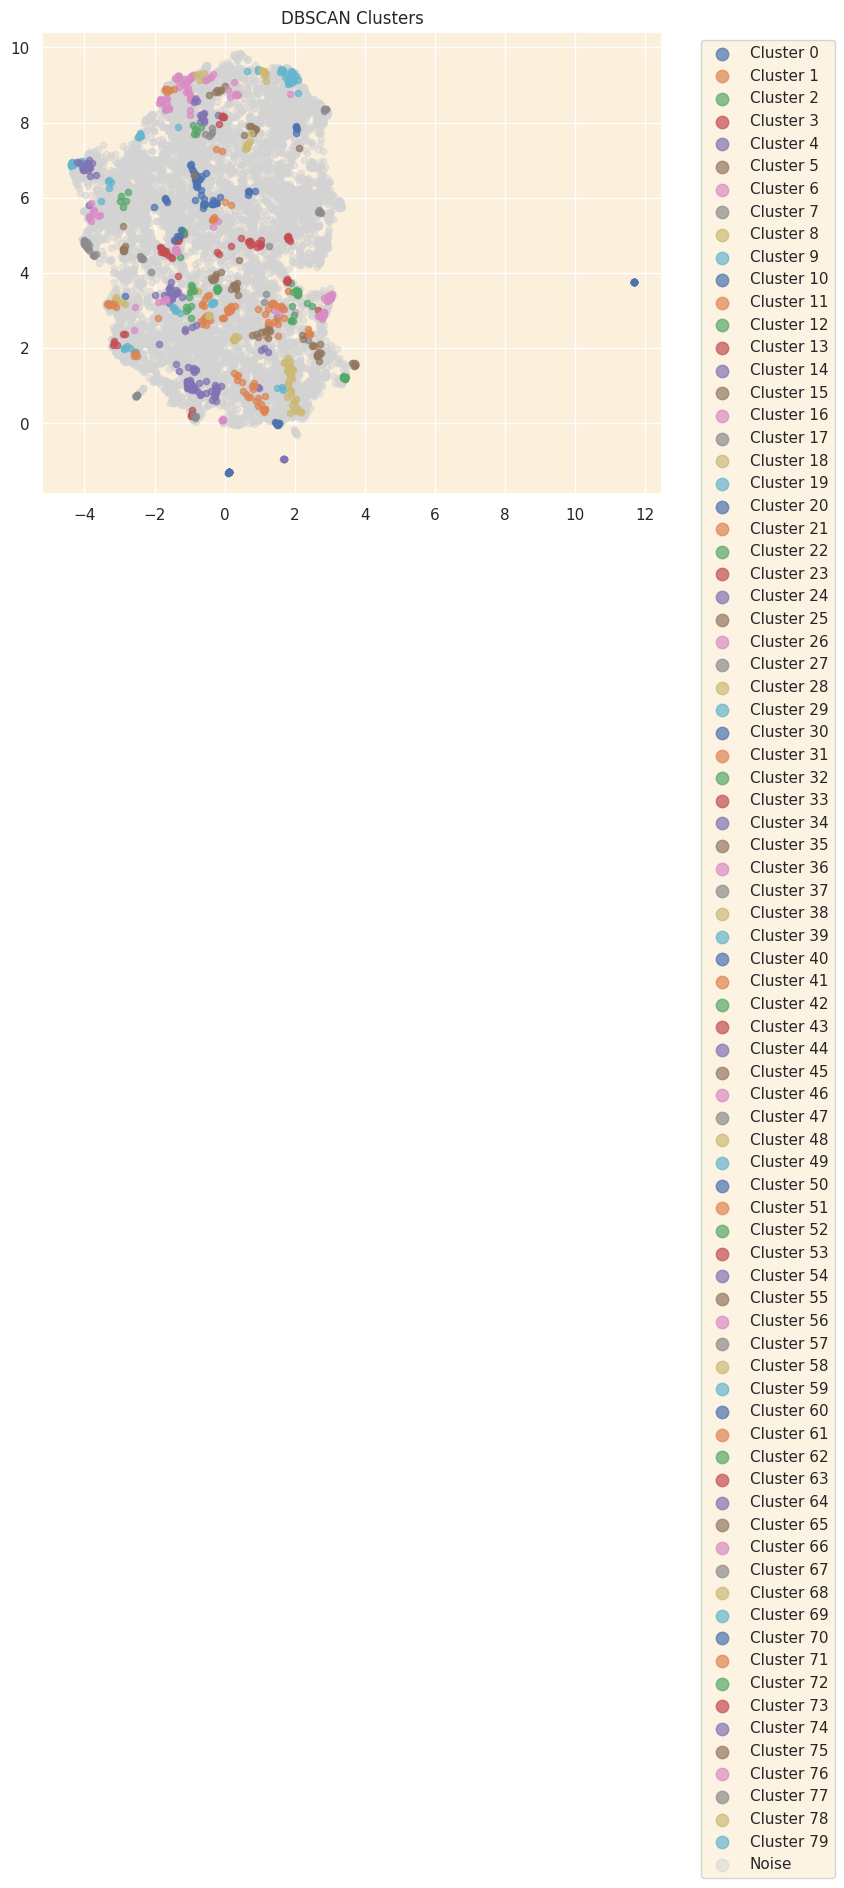

In [115]:
# Reduce to 2D for visualization
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(sbert_norm_2)
plot_clusters(embedding_2d, labels, "DBSCAN Clusters")

In [116]:
# Cluster with eps = 0.4
# 1) Reset dataframe index to simple 0..N-1
df = clipped_question.reset_index(drop=True).to_frame(name="question")

# 2) Make sure embeddings are a numpy array and aligned to df length
X = np.asarray(sbert_norm_2)          # sbert_embed from SBERT (dense array)
print("X.shape:", X.shape)
print("df.shape:", df.shape)

# Trim X to df length (safe guard)
if X.shape[0] != len(df):
    print("Warning: embeddings and df length differ. Trimming embeddings to df length.")
    X = X[:len(df)]
print("After trim X.shape:", X.shape)

# 3) Run DBSCAN on X (the aligned embeddings)
db = DBSCAN(eps=0.4, min_samples=5, metric='cosine')
labels = db.fit_predict(X)
labels = np.asarray(labels)
print("labels.shape:", labels.shape)
print("unique labels (sample):", np.unique(labels)[:20])

# 4) Final safety check: lengths must match
assert len(labels) == len(df), f"Length mismatch after clustering: {len(labels)} vs {len(df)}"

# 5) Attach labels to dataframe reliably
df['cluster'] = labels

# 6) Basic stats & evaluation
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = int((labels == -1).sum())
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points")

if n_clusters > 1:
    try:
        score = silhouette_score(X, labels, metric='cosine')
        dbcv_score = validity_index(sbert_norm_2, labels, metric='euclidean')
        print(f"Silhouette score: {score:.4f}")
        print(f"DBCV score: {dbcv_score:.4f}")
    except Exception as e:
        print("Silhouette score error:", e)

# 7) Inspect clusters safely using groupby
for cid, group in df.groupby('cluster'):
    print(f"\nCluster {cid} (size={len(group)})")
    # print top 5 example queries
    for q in group['question'].head(5).tolist():
        print(" -", q)

X.shape: (10000, 768)
df.shape: (10000, 1)
After trim X.shape: (10000, 768)
labels.shape: (10000,)
unique labels (sample): [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
DBSCAN found 39 clusters and 5530 noise points
Silhouette score: -0.1466
DBCV score: 0.0052

Cluster -1 (size=5530)
 - how do i get better settlers catan
 - formation advantage disadvantages
 - should older heavier beginner chose glider regular ft longboard
 - what contributions philosophers have made field medicine
 - what story christian mythology nost relevant today modern societies

Cluster 0 (size=4213)
 - what salary range year experience senior software engineer india which company currently paying maximum this range
 - my best friend loves my girl friend she knows it not doing anything what should i do
 - how do i control my horny emotions
 - what went wrong agriculture sector india
 - why does quora mark so many questions as “needing improvement” when original writer question thinks they’re perf

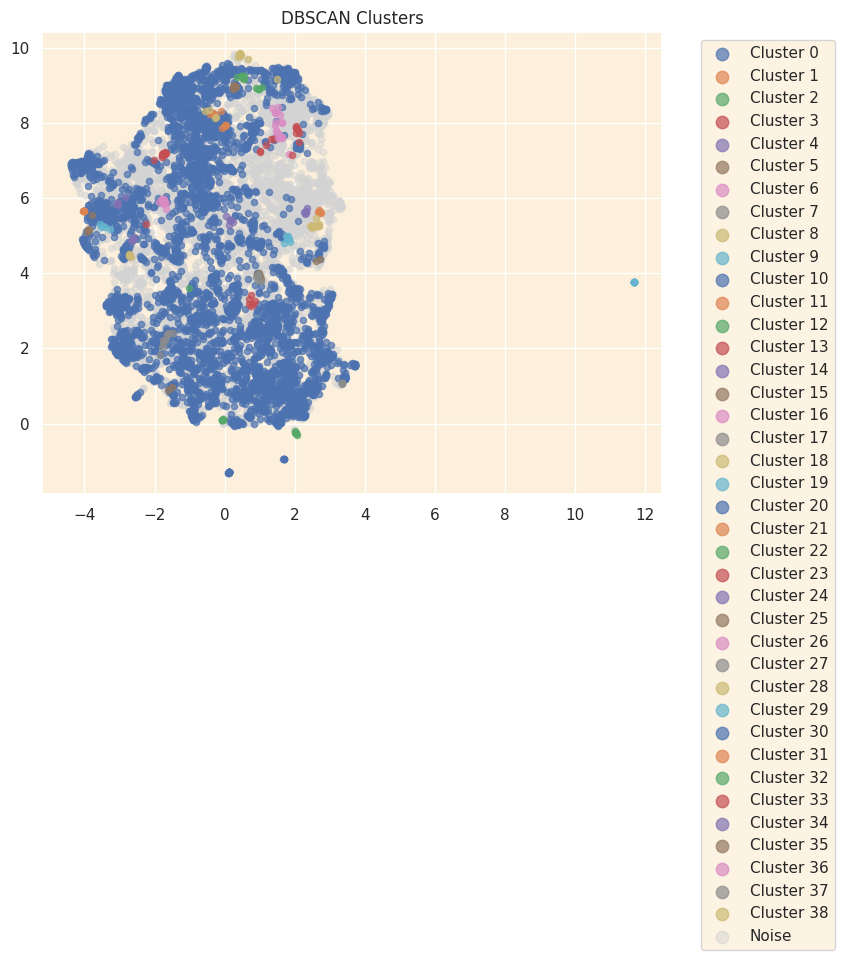

In [117]:
# Reduce to 2D for visualization
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(sbert_norm_2)
plot_clusters(embedding_2d, labels, "DBSCAN Clusters")

## 5.3. HDBSCAN Clustering

HDBSCAN automatically choose eps, so no need to grid search.

### 5.3.1 MiniLM

In [102]:
# Run HDBSCAN
hdb = hdbscan.HDBSCAN(
    min_cluster_size=15,     # tunable
    min_samples=2,           # smaller = more clusters, larger = stricter
    metric='euclidean',      # or 'cosine'
    cluster_selection_method='leaf'  # "eom" = standard; "leaf" = more clusters
)
labels = hdb.fit_predict(sbert_norm)

# Store results
df['cluster'] = labels

# Cluster info
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"HDBSCAN found {n_clusters} clusters and {n_noise} noise points")

# Evaluate
if n_clusters > 1:
    score = silhouette_score(sbert_norm, labels, metric='cosine')
    dbcv_score = validity_index(sbert_norm, labels, metric='euclidean')
    print(f"Silhouette score: {score:.3f}")
    print(f"DBCV score: {dbcv_score:.3f}")


# Inspect clusters
for cluster_id in sorted(set(labels)):
    if cluster_id == -1:
        print("\nCluster -1 (Noise)")
    else:
        print(f"\nCluster {cluster_id}")
    examples = df[df['cluster'] == cluster_id]['question'].head(5).tolist()
    for ex in examples:
        print(" -", ex)

HDBSCAN found 35 clusters and 9044 noise points
Silhouette score: -0.134
DBCV score: 0.006

Cluster -1 (Noise)
 - what salary range year experience senior software engineer india which company currently paying maximum this range
 - how do i get better settlers catan
 - formation advantage disadvantages
 - my best friend loves my girl friend she knows it not doing anything what should i do
 - should older heavier beginner chose glider regular ft longboard

Cluster 0
 - did neil armstrong really land moon
 - why there gravity
 - what keeps satellites orbit
 - what would happen earth stopped rotating one year
 - why does moon revolve around sun

Cluster 1
 - what happens transgender prisoners which prison they put
 - what it be lesbian
 - transgender person marries man after becoming woman he technically gay
 - how can gay man seduce straight man
 - do transgender people go hell

Cluster 2
 - what causes skin pigmentation
 - how do you remedy canker sore your jaw
 - how can i make my face

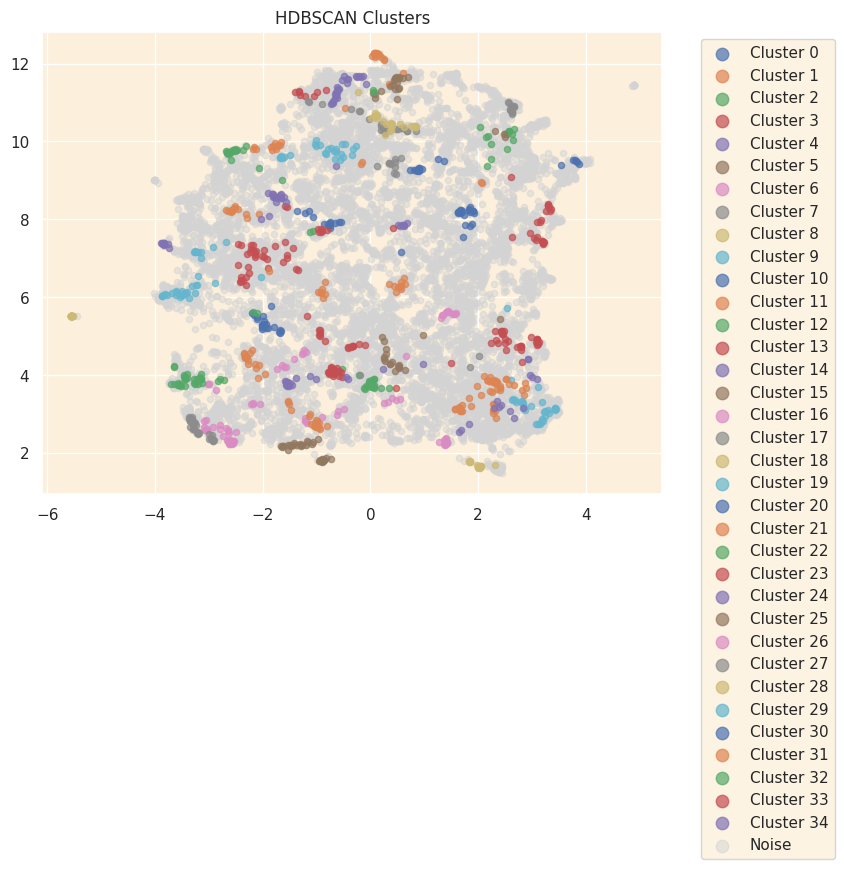

In [104]:
# Reduce to 2D for visualization
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(sbert_norm)
plot_clusters(embedding_2d, labels, "HDBSCAN Clusters")

### 5.3.2 MPNet

In [97]:
# Run HDBSCAN
hdb = hdbscan.HDBSCAN(
    min_cluster_size=15,     # tunable
    min_samples=2,           # smaller = more clusters, larger = stricter
    metric='euclidean',      # or 'cosine'
    cluster_selection_method='leaf'  # "eom" = standard; "leaf" = more clusters
)
labels = hdb.fit_predict(sbert_norm_2)

# Store results
df['cluster'] = labels

# Cluster info
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"HDBSCAN found {n_clusters} clusters and {n_noise} noise points")

# Evaluate
if n_clusters > 1:
    score = silhouette_score(sbert_norm_2, labels, metric='cosine')
    dbcv_score = validity_index(sbert_norm_2, labels, metric='euclidean')
    print(f"Silhouette score: {score:.3f}")
    print(f"DBCV score: {dbcv_score:.3f}")


# Inspect clusters
for cluster_id in sorted(set(labels)):
    if cluster_id == -1:
        print("\nCluster -1 (Noise)")
    else:
        print(f"\nCluster {cluster_id}")
    examples = df[df['cluster'] == cluster_id]['question'].head(5).tolist()
    for ex in examples:
        print(" -", ex)

HDBSCAN found 32 clusters and 9080 noise points
Silhouette score: -0.152
DBCV score: 0.005

Cluster -1 (Noise)
 - what salary range year experience senior software engineer india which company currently paying maximum this range
 - how do i get better settlers catan
 - formation advantage disadvantages
 - my best friend loves my girl friend she knows it not doing anything what should i do
 - should older heavier beginner chose glider regular ft longboard

Cluster 0
 - what chemical origins life how did non living chemical compounds generate self replicating complex life forms
 - how nany atoms o
 - i have recently learned about cells i read that cells come existing cell so where original cell made how
 - how do glycerin glycerol differ how they alike
 - what differences similarities between atoms molecules

Cluster 1
 - what some examples controlled experiment
 - what newton s third law motion examples
 - what some examples typical bacteria
 - what common goods what some examples
 - wh

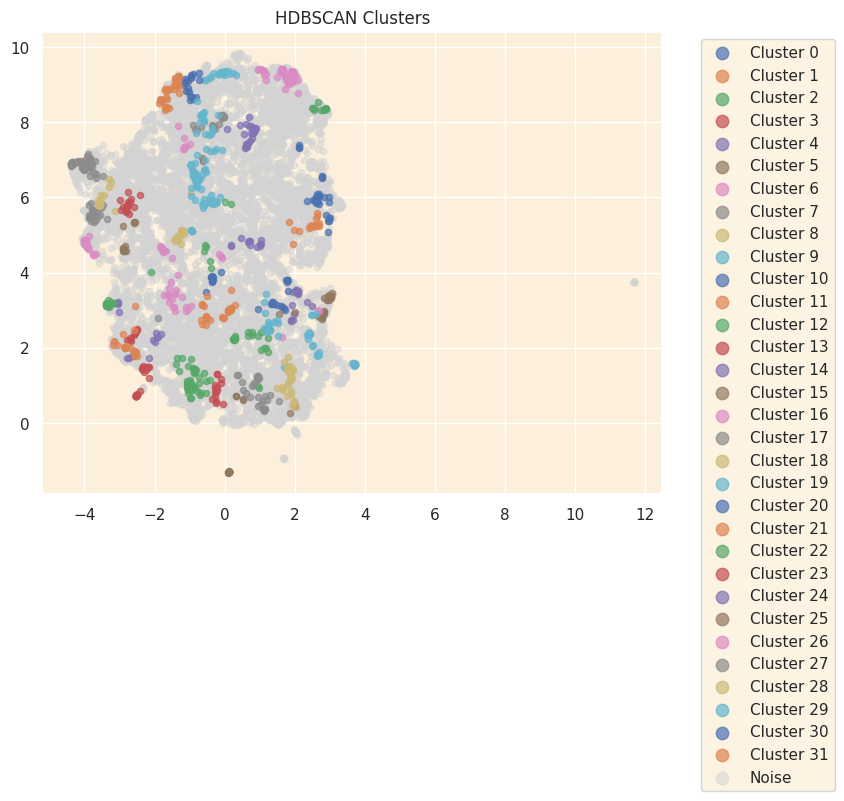

In [101]:
# Reduce to 2D for visualization
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = umap_model.fit_transform(sbert_norm_2)
plot_clusters(embedding_2d, labels, "HDBSCAN Clusters")

**Key takeaway in HDBSCAN/DBSCAN text clustering:**

Silhouette score is not entirely reliable when clustering texts